# To Increase: A review of pricing strageties and customer reactions
## *Kimberly Sokal*
***


# Introduction

Para intro

These are the 3 factors that I consider to be the most important in an approach to this classification problem:
- accuracy
- false positives are preferable to false negatives
- understandability   

# Take away

Para and such

# Step 1: Data

### Before we begin, import packages


In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Read in and understand the data

In [209]:
tests=pd.read_csv("Pricing_Test_data/test_results.csv")
users=pd.read_csv("Pricing_Test_data/user_table.csv")

In [210]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


In [211]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
user_id    275616 non-null int64
city       275616 non-null object
country    275616 non-null object
lat        275616 non-null float64
long       275616 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [212]:
#check that the prices are always what we expect
tests.price.unique()

array([39, 59])

In [216]:
#the time stamp values occasionally have an unusual format
tests.at[54,"timestamp"]

'2015-04-24 12:60:46'

In [213]:
#to avoid this w/o clarifying with the company on what it means, just keeping the day for now
tests["date"]=tests["timestamp"].apply(lambda x: x.split()[0])

In [214]:
#most of the columns in tests have very few unique values
tests["date"]=pd.to_datetime(tests.date)


In [40]:
#lets list out all of the options here

In [41]:
#I notices that the tables have different lengths, want to check the users
print(len(tests.user_id.unique()))
len(users.user_id.unique())

316800


275616

In [42]:
#interesting, and the user id's have essentially the same range
print(min(tests.user_id.unique()))
print(max(tests.user_id.unique()))
print(min(users.user_id.unique()))
max(users.user_id.unique())

3
1000000
3


999999

In [43]:
#because we will likely be interesting in segmenting customers, lets also list out different options
print(users.country.unique())
print(users.city.unique())

['USA']
['Peabody' 'Reno' 'Rialto' 'Carson City' 'Chicago' 'New York' 'Durham'
 'Burke' 'Oklahoma City' 'Charlotte' 'Chesapeake' 'Brentwood' 'Seattle'
 'Oakland' 'Stratford' 'Topeka' 'Fort Lauderdale' 'Newport News'
 'Kansas City' 'Amarillo' 'Lawton' 'Houston' 'Casas Adobes' 'Bridgeport'
 'Birmingham' 'Memphis' 'Quincy' 'Los Angeles' 'Federal Way'
 'Rancho Cucamonga' 'Fontana' 'Cuyahoga Falls' 'Gilbert' 'Redford'
 'Shreveport' 'Indianapolis' 'Austin' 'Hesperia' 'Meriden' 'Toms River'
 'Chicopee' 'Spring Hill' 'Dearborn' 'Jacksonville' 'Avondale' 'La Habra'
 'Toledo' 'Temple' 'Colton' 'San Antonio' 'Eau Claire' 'Union City'
 'Redondo Beach' 'Mesa' 'Overland Park' 'Revere' 'Wellington'
 'Citrus Heights' 'Fort Smith' 'Yonkers' 'Cary' 'Fullerton' 'Woonsocket'
 'Southfield' 'Nashville' 'North Fort Myers' 'Metairie' 'Florissant'
 'Germantown' 'Provo' 'Augusta-Richmond' 'Henderson' 'Dublin'
 'North Bergen' 'Louisville' 'Janesville' 'Conway' 'DeSoto'
 'Pinellas Park' 'Milwaukee' 'Portsmouth' '

In [44]:
print('source')
print(tests.source.unique())
print('device')
print(tests.device.unique())
print('operative_system')
print(tests.operative_system.unique())


source
['ads_facebook' 'seo-google' 'ads-bing' 'direct_traffic' 'ads-google'
 'seo_facebook' 'friend_referral' 'ads_other' 'ads-yahoo' 'seo-yahoo'
 'seo-bing' 'seo-other']
device
['mobile' 'web']
operative_system
['iOS' 'android' 'mac' 'windows' 'other' 'linux']


### First look at the test results

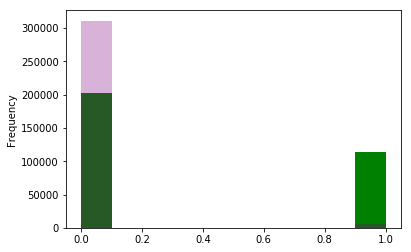

In [46]:
#quick check with a histogram
tests["test"].plot.hist(color="green", label = "Test Results")
tests["converted"].plot.hist(color="purple", alpha=0.3, label = "Converted")

It looks like the test populations aren't horribly imbalanced, so lets investigate what the statistical conclusion would be without further investigation.

Let's treat this as an A/B test.

In [94]:
#split data into sums for A and B tests and the converted for both.
A_sum1,B_sum1=tests.groupby("test").sum()["converted"]


In [96]:
#the orthogonal direction
Con0_sumB,Con1_sumB=tests.groupby("converted").sum()["test"]

In [107]:
#fill into our table
Con0_sumA=len(tests)-(A_sum1+B_sum1+Con0_sumB)
#for clarity
Con1_sumA=A_sum1

In [109]:
#check the math quickly
print(len(tests))
print(Con0_sumA+Con0_sumB+Con1_sumA+Con1_sumB)

316800
316800


In [108]:
### results table
print(Con0_sumA, Con0_sumB)
print(Con1_sumA, Con1_sumB)

198692 112300
4035 1773


In [114]:
### expected/naive values for results table, given populations
total=len(tests)
Exp_Con0_sumA=(Con0_sumA+Con0_sumB)/total*(Con0_sumA+Con1_sumA)
Exp_Con0_sumB=(Con0_sumA+Con0_sumB)/total*(Con0_sumB+Con1_sumB)
Exp_Con1_sumA=(Con1_sumA+Con1_sumB)/total*(Con0_sumA+Con1_sumA)
Exp_Con1_sumB=(Con1_sumA+Con1_sumB)/total*(Con0_sumB+Con1_sumB)

In [115]:
### naive results table
print(Exp_Con0_sumA, Exp_Con0_sumB)
print(Exp_Con1_sumA, Exp_Con1_sumB)

199010.33833333335 111981.66166666667
3716.661666666667 2091.338333333333


In [125]:
### Apply Chi^2 tests to see if the conversion rate between A and B is significantly different
chi2=(Con0_sumA-Exp_Con0_sumA)**2/Exp_Con0_sumA+(
    Con1_sumA-Exp_Con1_sumA)**2/Exp_Con1_sumA+(
    Con0_sumB-Exp_Con0_sumB)**2/Exp_Con0_sumB+(Con1_sumB-Exp_Con1_sumB)**2/Exp_Con1_sumB

In [126]:
chi2

77.13706553092187

In [118]:
obs=[[Con0_sumA,Con0_sumB],[Con1_sumA,Con1_sumB]]

In [119]:
from scipy.stats import chi2_contingency

In [120]:
chi2_contingency(obs)

(76.89494424182652,
 1.8029808465845306e-18,
 1,
 array([[199010.33833333, 111981.66166667],
        [  3716.66166667,   2091.33833333]]))

In [131]:
#this tells me that the results ARE significant
# chi^2 = 77, and pvalue = 2e-18

#reminder, the hypothesis here is that the two tests are equally effective
#this shows that they are not, the rates are different

In [155]:
#conversion rate for the raised price
rateB=Con1_sumB/Con0_sumB
rateB

0.01578806767586821

In [154]:
#conversion rate originally
rateA=Con1_sumA/Con0_sumA
rateA

0.020307813097658688

In [156]:
#loss in rate
rateB/rateA

0.7774381022685518

In [139]:
#loss in rate but the increase in money
rateB/rateA*57./37.

1.197674914305607

In [141]:
#uncertainties
#assuming counting statistics, unc on N is N**0.5
uncA=(Con1_sumA+Con0_sumA)**-0.5
uncB=(Con1_sumB+Con0_sumB)**-0.5

uncA, uncB

(0.002220977726584586, 0.002960796566166774)

Based on the quick experiment from above, we learned that yes, the conversion rate is statisically different, and lower, for users that are shown the increased price. However, the price gain is enough to compensate for the lost converts, in fact, we would predict making almost 20% more if we switch to the new price across the board.


For further work, need to convert instead to a money conversion rate.

### Power analysis to investigate the sample size

In [308]:
from statsmodels.stats.power import TTestIndPower

# parameters for the analysis 
effect_size = 0.2
alpha = 0.05 # significance level
power = 0.9

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha,ratio=0.6)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 701.70


In [307]:
(526.)**.5

22.93468988235943

# User behavior

In [150]:
#need to develop a way to test conversion rates between any input options

In [258]:
#split data into sums for A and B tests and the converted for both.
#first print relevant things
testsA=tests.groupby("test").get_group(0)
testsB=tests.groupby("test").get_group(1)
print('Number of people given test A:', len(testsA))
print('Number of people given test B:', len(testsB))

#define the matrix
#the orthogonal direction
Con0_sumA=len(testsA.groupby("converted").get_group(0))
Con1_sumA=len(testsA.groupby("converted").get_group(1))
Con0_sumB=len(testsB.groupby("converted").get_group(0))
Con1_sumB=len(testsB.groupby("converted").get_group(1))

#print out the conversion rates
rateA=Con1_sumA/Con0_sumA
rateB=Con1_sumB/Con0_sumB
uncA=(Con1_sumA+Con0_sumA)**-0.5
uncB=(Con1_sumB+Con0_sumB)**-0.5

print('Rate A = {0} =/- {1}'.format(rateA,uncA))
print('Rate B = {0} =/- {1}'.format(rateB,uncB))

#get our table
#want this normalized by price
obs=[[Con0_sumA,Con0_sumB],[Con1_sumA,Con1_sumB]]
print('Table:')
print(obs)

#get chi
chi=chi2_contingency(obs)
print(chi)

Number of people given test A: 202727
Number of people given test B: 114073
Rate A = 0.020307813097658688 =/- 0.002220977726584586
Rate B = 0.01578806767586821 =/- 0.002960796566166774
Table:
[[198692, 112300], [4035, 1773]]
(76.89494424182652, 1.8029808465845306e-18, 1, array([[199010.33833333, 111981.66166667],
       [  3716.66166667,   2091.33833333]]))


In [302]:
### DEFINE THE MIN conversion rate for B that is acceptable
#   37./57. * RateA = 0.65 to break even

0.6491228070175439

In [301]:
tests.sort_values(by="date", inplace=True)
tests.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,date
258662,889040,2015-03-02 01:16:13,ads_facebook,web,windows,1,59,0,2015-03-02
83542,331811,2015-03-02 11:48:15,ads_facebook,mobile,other,0,39,0,2015-03-02
284603,83333,2015-03-02 12:37:34,friend_referral,web,windows,0,39,0,2015-03-02
310900,449771,2015-03-02 19:58:01,ads_facebook,web,windows,0,39,0,2015-03-02
83469,691611,2015-03-02 13:30:20,ads_other,mobile,android,0,39,0,2015-03-02


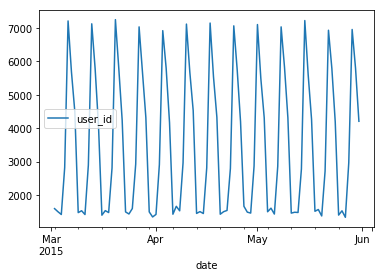

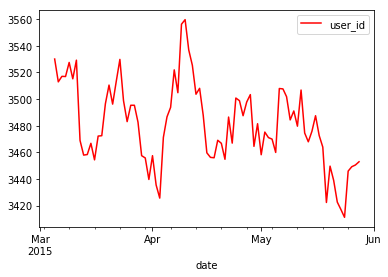

In [254]:
a=tests[["date","user_id"]].groupby("date").count()
a.plot()
rollint=a.rolling(7,center=True)
rollint.mean().plot(color='red')   

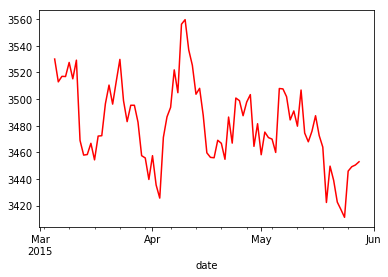

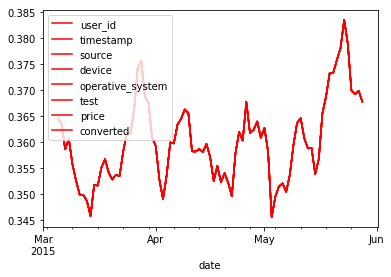

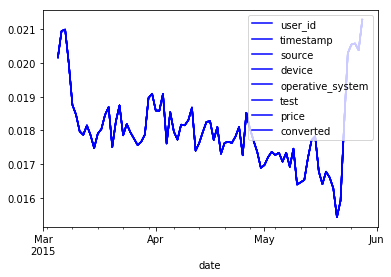

In [300]:
this='y'
if this == 'y':
    testgroup=tests.copy()
    tot=len(testgroup)

    a=testgroup.groupby("date").count()
    #plot rolling average for all users in group
    rollint=a.rolling(7,center=True)
    rollint["user_id"].mean().plot(color='red')
    
    #plot rolling average for % of B tests
    b=testgroup.groupby("test").get_group(1)
    b=b.groupby("date").count()/a
    rollint=b.rolling(7,center=True)
    ax=rollint.mean().plot(color='red')
    
    #plot rolling average for % of converted
    c=testgroup.groupby("converted").get_group(1)
    c=c.groupby("date").count()/a
    rollint=c.rolling(7,center=True)
    rollint.mean().plot(color='blue')
   
    #plot rolling average for % converted for a
    


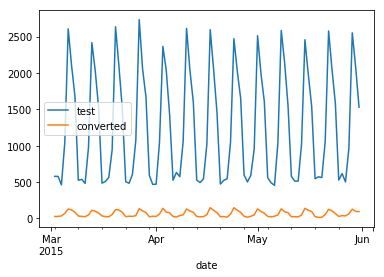

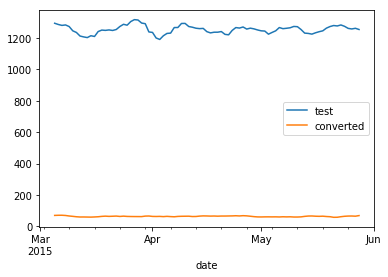

In [256]:
b=tests[["date","test","converted"]].groupby("date").sum()
b.plot()
rollint=b.rolling(7,center=True)
rollint.mean().plot()   

In [259]:
tests.groupby("date").get_group("2015-05-08")

,user_id,timestamp,source,device,operative_system,test,price,converted,date
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,2015-05-08
75,491177,2015-05-08 10:10:13,ads_facebook,mobile,iOS,1,59,0,2015-05-08
78,375154,2015-05-08 10:57:02,ads-google,mobile,iOS,0,39,1,2015-05-08
87,684549,2015-05-08 08:13:22,direct_traffic,mobile,android,0,39,0,2015-05-08
119,608626,2015-05-08 15:34:09,ads-google,mobile,iOS,0,39,0,2015-05-08
274,583141,2015-05-08 10:25:17,friend_referral,web,windows,1,59,0,2015-05-08
399,173976,2015-05-08 11:50:50,ads_facebook,web,windows,0,39,0,2015-05-08
423,202712,2015-05-08 09:41:26,ads-google,mobile,android,0,39,0,2015-05-08
467,627903,2015-05-08 12:15:26,ads-google,mobile,android,1,59,0,2015-05-08
519,511198,2015-05-08 10:55:60,ads-bing,mobile,iOS,1,59,0,2015-05-08
